Fold 1/5
Epoch 1/20, Loss: 5.712537207704492, Accuracy: 0.006493506493506494, Val Loss: 5.564194935733232, Val Accuracy: 0.006493506493506494
Epoch 2/20, Loss: 5.629483119314816, Accuracy: 0.006493506493506494, Val Loss: 5.566186731412762, Val Accuracy: 0.0
Epoch 3/20, Loss: 5.604817998916301, Accuracy: 0.00487012987012987, Val Loss: 5.552392919927812, Val Accuracy: 0.00974025974025974
Epoch 4/20, Loss: 5.689916516290654, Accuracy: 0.006493506493506494, Val Loss: 5.551358591533646, Val Accuracy: 0.012987012987012988
Epoch 5/20, Loss: 5.712862879331805, Accuracy: 0.00487012987012987, Val Loss: 5.627642286913957, Val Accuracy: 0.00974025974025974
Epoch 6/20, Loss: 5.705354853982038, Accuracy: 0.00974025974025974, Val Loss: 5.54238975632776, Val Accuracy: 0.006493506493506494
Epoch 7/20, Loss: 5.730243532813771, Accuracy: 0.00974025974025974, Val Loss: 5.558243347724029, Val Accuracy: 0.006493506493506494
Epoch 8/20, Loss: 5.668802363826208, Accuracy: 0.003246753246753247, Val Loss: 5.519

/Users/hyorimlee/Documents/GitHub/neural_network/src/utils/activationFunc.py:57: RuntimeWarning: overflow encountered in exp
  return np.exp(x) / np.sum(np.exp(x))
/Users/hyorimlee/Documents/GitHub/neural_network/src/utils/activationFunc.py:57: RuntimeWarning: invalid value encountered in divide
  return np.exp(x) / np.sum(np.exp(x))


Epoch 17/20, Loss: nan, Accuracy: 0.006493506493506494, Val Loss: nan, Val Accuracy: 0.006493506493506494
Epoch 18/20, Loss: nan, Accuracy: 0.006493506493506494, Val Loss: nan, Val Accuracy: 0.006493506493506494
Epoch 19/20, Loss: nan, Accuracy: 0.006493506493506494, Val Loss: nan, Val Accuracy: 0.006493506493506494
Epoch 20/20, Loss: nan, Accuracy: 0.006493506493506494, Val Loss: nan, Val Accuracy: 0.006493506493506494
Fold 2/5
Epoch 1/20, Loss: 5.747746092118006, Accuracy: 0.00487012987012987, Val Loss: 5.550387248668172, Val Accuracy: 0.0
Epoch 2/20, Loss: 5.737027786392085, Accuracy: 0.006493506493506494, Val Loss: 5.530094552839723, Val Accuracy: 0.003246753246753247
Epoch 3/20, Loss: 5.719443673409052, Accuracy: 0.004058441558441558, Val Loss: 5.571927198196344, Val Accuracy: 0.00974025974025974
Epoch 4/20, Loss: 5.858703326788419, Accuracy: 0.004058441558441558, Val Loss: 5.611324486827702, Val Accuracy: 0.006493506493506494
Epoch 5/20, Loss: 5.820369946525932, Accuracy: 0.00162

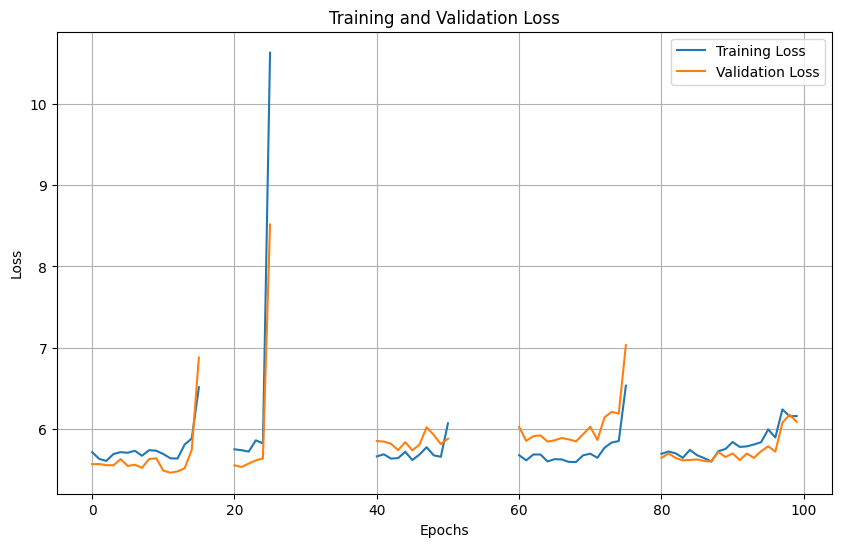

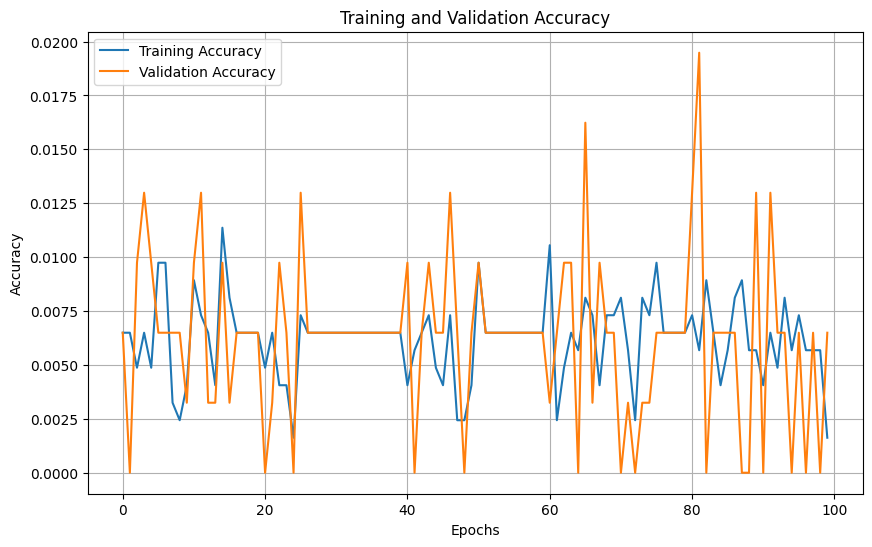

In [2]:
import os
import sys 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 현재 작업 중인 Notebook의 경로 가져오기
notebook_dir = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(notebook_dir, "../../../utils")))
sys.path.append(os.path.abspath(os.path.join(notebook_dir, "../../../class")))

from data import preprocess_data

from Train import Train

# 실험 설정
csv_path = "../../../Data/font_data_1540.csv"

train_instance = Train(
    epoch=20,
    batch=16,
    activation="leaky_relu",
    output_activation="softmax",
    weight_init="He",
    learning_rate=0.01,
    optimizer="adam",
    dropout=0.5,
    loss_function="cross_entropy"
)

# 데이터 로드
inputs, targets_one_hot, targets = train_instance.load_data(csv_path)

# K-Fold Cross Validation 준비
folds = train_instance.k_fold_split(inputs, targets_one_hot)
# 학습 실행
for i, (X_train, y_train, X_val, y_val) in enumerate(folds):
    print(f"Fold {i + 1}/{len(folds)}")
    train_instance.train(X_train, y_train, X_val, y_val,[256,200])

# 결과 저장 및 시각화
train_instance.save_results()
train_instance.plot_history()